# IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime
import os
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
from pylab import rcParams

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

# READ DATA

In [2]:
df_bills_uc1 = pd.read_excel(os.getcwd().replace('notebooks','data/raw/') + 'FATURAS - UFPR.xlsx', sheet_name='UC1')
df_bills_uc2 = pd.read_excel(os.getcwd().replace('notebooks','data/raw/') + 'FATURAS - UFPR.xlsx', sheet_name='UC2')
df_bills_uc3 = pd.read_excel(os.getcwd().replace('notebooks','data/raw/') + 'FATURAS - UFPR.xlsx', sheet_name='UC3')
df_bills_uc4 = pd.read_excel(os.getcwd().replace('notebooks','data/raw/') + 'FATURAS - UFPR.xlsx', sheet_name='UC4')
df_bills_uc5 = pd.read_excel(os.getcwd().replace('notebooks','data/raw/') + 'FATURAS - UFPR.xlsx', sheet_name='UC5')

In [3]:
df_bills_ucs = df_bills_uc1[['DATA','ANO','MÊS']].copy()
df_bills_ucs['DEMANDA_CONTRATADA_P'] = df_bills_uc1['DEMANDA_CONTRATADA_P'] + df_bills_uc2['DEMANDA_CONTRATADA_P'] + df_bills_uc3['DEMANDA_CONTRATADA_P'] + df_bills_uc4['DEMANDA_CONTRATADA_P'] + df_bills_uc5['DEMANDA_CONTRATADA_P']
df_bills_ucs['DEMANDA_CONTRATADA_FP'] = df_bills_uc1['DEMANDA_CONTRATADA_FP'] + df_bills_uc2['DEMANDA_CONTRATADA_FP'] + df_bills_uc3['DEMANDA_CONTRATADA_FP'] + df_bills_uc4['DEMANDA_CONTRATADA_FP'] + df_bills_uc5['DEMANDA_CONTRATADA_FP']
df_bills_ucs['DEMANDA_REGISTRADA_P'] = df_bills_uc1['DEMANDA_REGISTRADA_P'] + df_bills_uc2['DEMANDA_REGISTRADA_P'] + df_bills_uc3['DEMANDA_REGISTRADA_P'] + df_bills_uc4['DEMANDA_REGISTRADA_P'] + df_bills_uc5['DEMANDA_REGISTRADA_P']
df_bills_ucs['DEMANDA_REGISTRADA_FP'] = df_bills_uc1['DEMANDA_REGISTRADA_FP'] + df_bills_uc2['DEMANDA_REGISTRADA_FP'] + df_bills_uc3['DEMANDA_REGISTRADA_FP'] + df_bills_uc4['DEMANDA_REGISTRADA_FP'] + df_bills_uc5['DEMANDA_REGISTRADA_FP']
df_bills_ucs['CONSUMO_TOTAL'] = df_bills_uc1['CONSUMO_TOTAL'] + df_bills_uc2['CONSUMO_TOTAL'] + df_bills_uc3['CONSUMO_TOTAL'] + df_bills_uc4['CONSUMO_TOTAL'] + df_bills_uc5['CONSUMO_TOTAL']

df_bills_ucs.to_excel(os.getcwd().replace('notebooks','data/interim/') + 'FATURAS - UFPR_etl3.xlsx')

df_bills_ucs.head()

,DATA,ANO,MÊS,DEMANDA_CONTRATADA_P,DEMANDA_CONTRATADA_FP,DEMANDA_REGISTRADA_P,DEMANDA_REGISTRADA_FP,CONSUMO_TOTAL
0,2020-06-20,2020,6,0,3330.0,1026.74,1178.19,626399.0
1,2020-05-20,2020,5,0,3330.0,993.89,1113.05,611495.0
2,2020-04-20,2020,4,0,3330.0,1349.17,2023.55,711086.0
3,2020-03-20,2020,3,0,3330.0,2027.84,3239.39,931604.0
4,2020-02-20,2020,2,0,3330.0,1852.3,2864.03,935313.0


In [4]:
df_pld_hist = pd.read_excel(os.getcwd().replace('notebooks','data/external/') + 'PLD_CCEE_HISTORICO.xlsx')

# PREPARE DATA

In [5]:
df_pld_hist[['MÊS','ANO']] = df_pld_hist['Mês'].str.split("/",expand=True)
df_pld_hist = df_pld_hist.sort_values(['ANO','MÊS'])

df_pld_hist.to_excel(os.getcwd().replace('notebooks','data/interim/') + 'PLD_CCEE_HISTORICO_etl1.xlsx')

df_pld_hist.head()


,Mês,SE/CO,S,NE,N,MÊS,ANO
211,05/2003,7.30,7.30,6.34,6.23,05,2003
210,06/2003,11.22,11.22,10.53,10.43,06,2003
209,07/2003,13.13,13.92,9.87,13.10,07,2003
208,08/2003,16.95,18.56,13.37,16.89,08,2003
207,09/2003,18.30,20.52,15.44,18.30,09,2003


In [6]:
df_bills_uc1 = df_bills_uc1.dropna(subset=['ANO','MÊS'])
df_bills_uc1 = df_bills_uc1.sort_values(['ANO','MÊS'])
df_bills_uc1['MÊS'] = df_bills_uc1['MÊS'].map(int)
df_bills_uc1['ANO'] = df_bills_uc1['ANO'].map(int)
df_bills_uc1[['ANO','MÊS']] = df_bills_uc1[['ANO','MÊS']].astype(str)

df_bills_uc1.to_excel(os.getcwd().replace('notebooks','data/interim/') + 'FATURAS - UFPR_etl1.xlsx')

df_bills_uc1 = df_bills_uc1[df_bills_uc1['ANO']!='2020']

df_bills_uc1.to_excel(os.getcwd().replace('notebooks','data/interim/') + 'FATURAS - UFPR_etl2.xlsx')

df_bills_uc1.head(50)

,DATA,ANO,MÊS,PERIODO,PIS/PASEP,COFINS,ICMS,DEMANDA_CONTRATADA_P,DEMANDA_CONTRATADA_FP,DEMANDA_REGISTRADA_P,DEMANDA_REGISTRADA_FP,DEMANDA_ISENTA_P,DEMANDA_ISENTA_FP,TAR_TUSD_KW_P,TAR_TUSD_KW_FP,ENERGIA_PONTA,ENERGIA_FPONTA,TAR_TUSD_KWH_P,TAR_TUSD_KWH_FP,TAR_TE_KWH_P,TAR_TE_KWH_FP,REAT_KVAR_PONTA,REAT_KVAR_FPONTA,TAR_REAT_PONTA,TAR_REAT_FPONTA,VALOR_DA_FATURA,CONSUMO_TOTAL,Acrescimo_Bamar,Acrescimo_Bverm1,Acrescimo_Bverm2,Categoria Tarifa
41,2017-01-20,2017,1,31,0.73,3.37,0.29,0,2100,938.88,1679.04,0,420.86,14.60,14.60,50094,554587,0.84218,0.06039,0.43634,0.27472,97,995,0.460392,0.460675,348995.54,604681,0.00,0.00,0.00,VERDE
40,2017-02-20,2017,2,31,0.80,3.70,0.29,0,2100,1039.68,2183.04,0,0.00,14.60,14.60,52906,670533,0.84218,0.06039,0.43634,0.27472,65,1114,0.460392,0.460675,418896.94,723439,0.00,0.00,0.00,VERDE
39,2017-03-20,2017,3,28,0.89,4.06,0.29,0,2100,1411.00,2278.08,0,0.00,14.60,14.60,65969,659486,0.84218,0.06039,0.43634,0.27472,125,945,0.460392,0.460675,454546.88,725455,17219.86,0.00,0.00,VERDE
38,2017-04-20,2017,4,31,0.97,4.48,0.29,0,2100,1468.80,2226.24,0,0.00,14.60,14.60,68729,699426,0.84218,0.06039,0.43634,0.27472,0,727,0.460392,0.460675,445295.39,768155,6789.30,24894.20,0.00,VERDE
37,2017-05-20,2017,5,30,1.07,4.93,0.29,0,2100,1540.80,1952.64,0,147.36,14.60,14.60,60056,621031,0.84218,0.06039,0.43634,0.27472,0,360,0.460392,0.460675,418867.77,681087,0.00,31364.00,0.00,VERDE
36,2017-06-20,2017,6,31,1.18,5.42,0.29,0,2100,1287.36,2076.48,0,23.52,14.60,14.60,68787,661984,0.84218,0.06039,0.43634,0.27472,2,349,0.460392,0.460675,445235.20,730771,0.00,9856.47,0.00,VERDE
35,2017-07-20,2017,7,30,1.30,5.96,0.29,0,2100,1215.36,1774.08,0,325.92,14.60,14.60,60754,570840,0.84218,0.06039,0.43634,0.27472,0,77,0.460392,0.460675,429421.17,631594,14493.04,0.00,0.00,VERDE
34,2017-08-20,2017,8,31,1.43,6.55,0.29,0,2100,1319.04,1704.96,0,395.04,14.60,14.60,62347,601189,0.84218,0.06039,0.43634,0.27472,0,45,0.460392,0.460675,462628.07,663536,6093.33,22342.46,0.00,VERDE
33,2017-09-20,2017,9,31,1.52,6.98,0.29,0,2100,1379.52,2122.56,0,0.00,14.60,14.60,71800,662292,0.84218,0.06039,0.43634,0.27472,4,231,0.460392,0.460675,510378.31,734092,16630.83,10205.24,0.00,VERDE
32,2017-10-20,2017,10,30,1.65,7.60,0.29,0,2100,1342.08,2093.76,0,6.24,14.60,14.60,62469,635842,0.84218,0.06039,0.43634,0.27472,2,624,0.460392,0.460675,505058.18,698311,7043.81,27125.81,0.00,VERDE


# DATA ANALISYS

## DEMAND

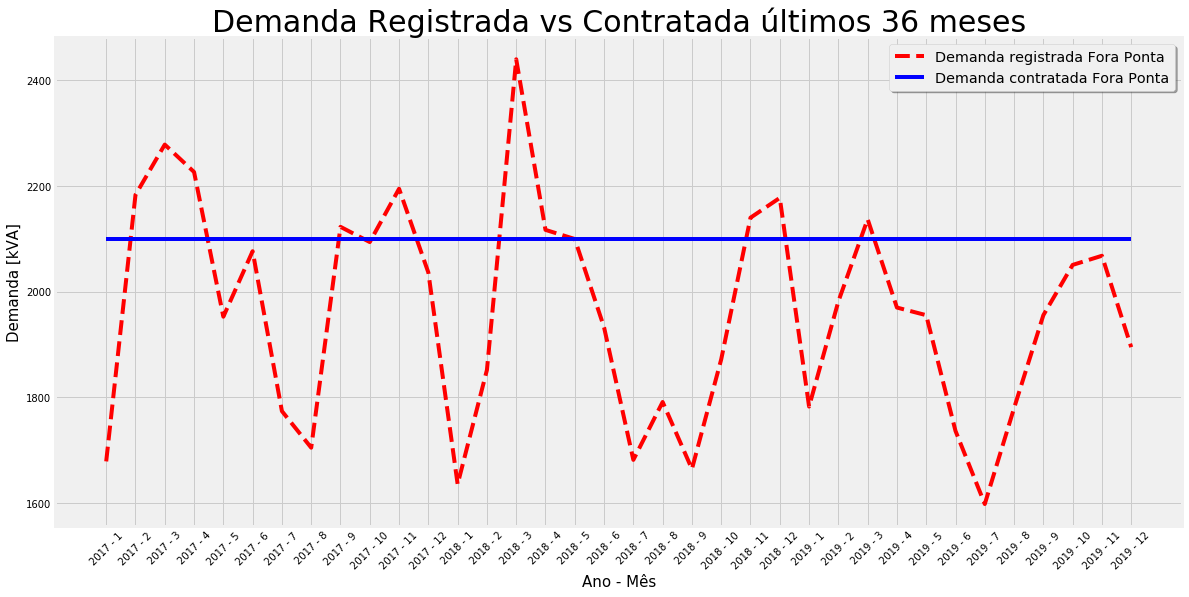

In [7]:
# CREATE FIGURE
fig,ax = plt.subplots(figsize = (18,9))

# PLOT DATA
ax.plot(df_bills_uc1['ANO'] + ' - ' + df_bills_uc1['MÊS'], df_bills_uc1.DEMANDA_REGISTRADA_FP, 'k--', label='Demanda registrada Fora Ponta', color = 'red')
ax.plot(df_bills_uc1['ANO'] + ' - ' + df_bills_uc1['MÊS'], df_bills_uc1.DEMANDA_CONTRATADA_FP, label='Demanda contratada Fora Ponta', color = 'blue')

# NAME AXES AND FIGURE
plt.xlabel('Ano - Mês', fontsize = 15)
plt.ylabel('Demanda [kVA]', fontsize = 15)
plt.title('Demanda Registrada vs Contratada últimos 36 meses', fontsize = 30)

# ROTATE TICKS
plt.xticks(rotation=45)

# SET LEGEND POSITION
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

# PLOT
plt.show()

## CONSUMPTION

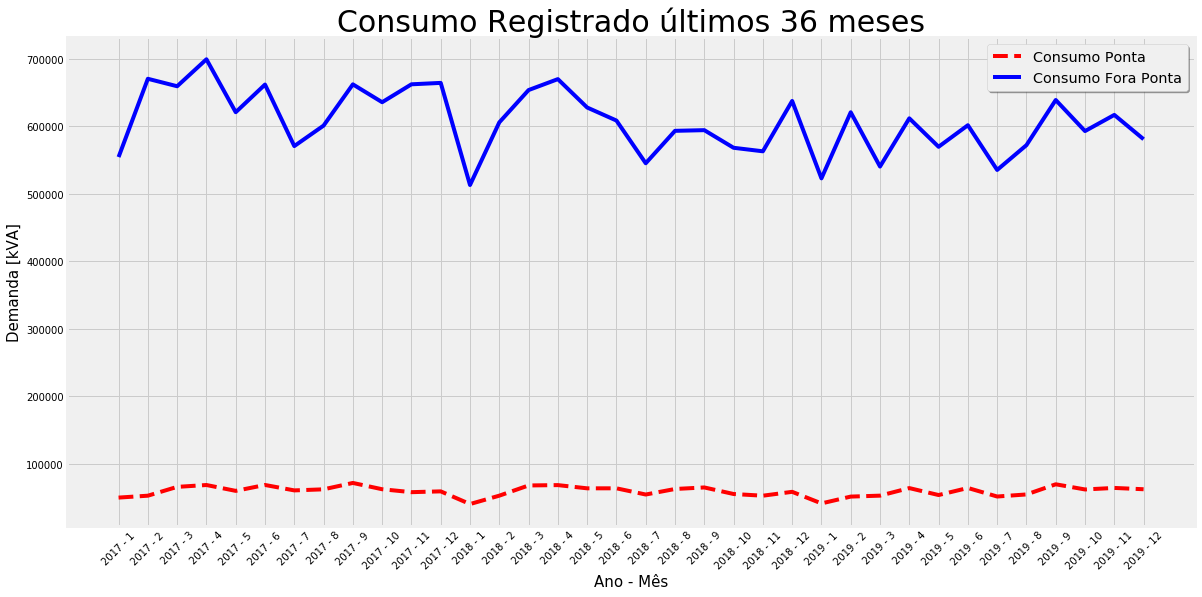

In [8]:
# CREATE FIGURE
fig,ax = plt.subplots(figsize = (18,9))

# PLOT DATA
ax.plot(df_bills_uc1['ANO'] + ' - ' + df_bills_uc1['MÊS'], df_bills_uc1.ENERGIA_PONTA, 'k--', label='Consumo Ponta', color = 'red')
ax.plot(df_bills_uc1['ANO'] + ' - ' + df_bills_uc1['MÊS'], df_bills_uc1.ENERGIA_FPONTA, label='Consumo Fora Ponta', color = 'blue')

# NAME AXES AND FIGURE
plt.xlabel('Ano - Mês', fontsize = 15)
plt.ylabel('Demanda [kVA]', fontsize = 15)
plt.title('Consumo Registrado últimos 36 meses', fontsize = 30)

# ROTATE TICKS
plt.xticks(rotation=45)

# SET LEGEND POSITION
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')


# PLOT
plt.show()

## PLD

O cálculo do PLD considera os preços semanais por patamar de carga - leve, médio e pesado - ponderado pelo número de horas em cada patamar e em cada semana do mês.


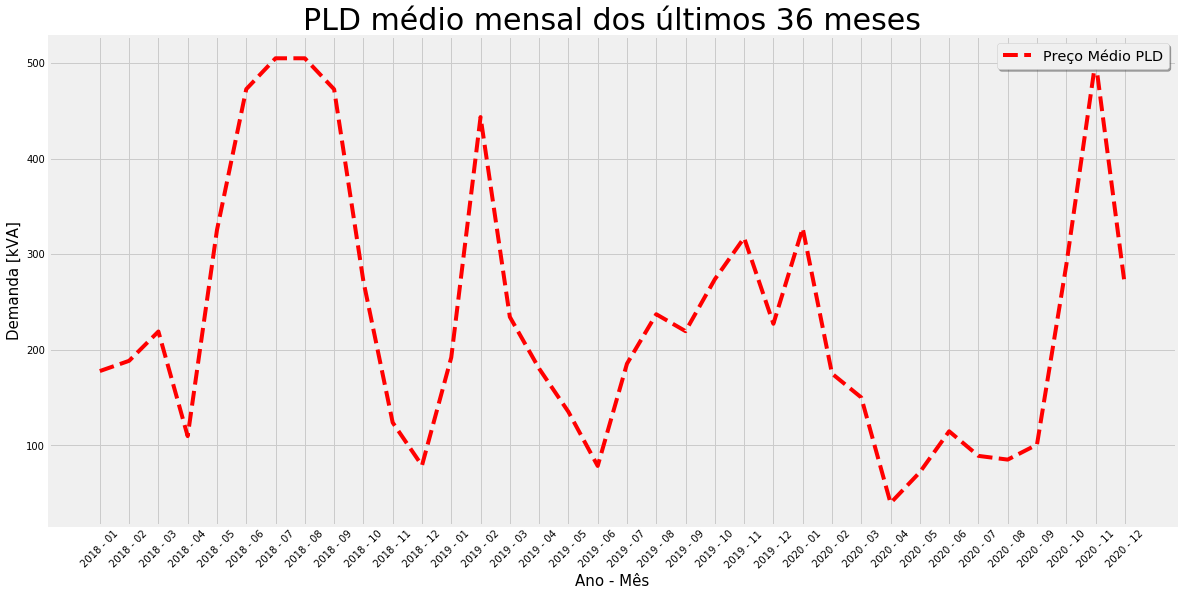


Fonte: https://www.ccee.org.br/portal/faces/pages_publico/o-que-fazemos/como_ccee_atua/precos/precos_medios?_adf.ctrl-state=13um7ck11y_1&_afrLoop=55133515843248#!%40%40%3F_afrLoop%3D55133515843248%26_adf.ctrl-state%3D13um7ck11y_5


In [9]:
print('O cálculo do PLD considera os preços semanais por patamar de carga - leve, médio e pesado - ponderado pelo número de horas em cada patamar e em cada semana do mês.')#\nFonte: https://www.ccee.org.br/portal/faces/pages_publico/o-que-fazemos/como_ccee_atua/precos/precos_medios?_adf.ctrl-state=13um7ck11y_1&_afrLoop=55133515843248#!%40%40%3F_afrLoop%3D55133515843248%26_adf.ctrl-state%3D13um7ck11y_5')

# CREATE FIGURE
fig,ax = plt.subplots(figsize = (18,9))

# PLOT DATA
ax.plot(df_pld_hist['ANO'].tail(36) + ' - ' + df_pld_hist['MÊS'].tail(36), df_pld_hist.S.tail(36), 'k--', label='Preço Médio PLD', color = 'red')

# NAME AXES AND FIGURE
plt.xlabel('Ano - Mês', fontsize = 15)
plt.ylabel('Demanda [kVA]', fontsize = 15)
plt.title('PLD médio mensal dos últimos 36 meses', fontsize = 30)

# ROTATE TICKS
plt.xticks(rotation=45)

# SET LEGEND POSITION
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')


# PLOT
plt.show()

print('\nFonte: https://www.ccee.org.br/portal/faces/pages_publico/o-que-fazemos/como_ccee_atua/precos/precos_medios?_adf.ctrl-state=13um7ck11y_1&_afrLoop=55133515843248#!%40%40%3F_afrLoop%3D55133515843248%26_adf.ctrl-state%3D13um7ck11y_5')


Visto que os dados analisados gráficamente acima aprensentam caracteristicas sazonais, o modelo ARIMA (AutoRegressive Integrated Moving Average) deverá atender as necessidades de projeção de curto a médio prazo.

# ARIMA FORESCAST

## PLD

### DATA ETL

In [10]:
df_pld_hist['DATE'] = df_pld_hist['ANO']+ '-' + df_pld_hist['MÊS'] + '-'  + '01' 
df_pld_hist['DATE'] = pd.to_datetime(df_pld_hist['DATE'])

df_pld_hist_ml = df_pld_hist.set_index('DATE')
df_pld_hist_ml.head()

,Mês,SE/CO,S,NE,N,MÊS,ANO
DATE,,,,,,,
2003-05-01,05/2003,7.30,7.30,6.34,6.23,05,2003
2003-06-01,06/2003,11.22,11.22,10.53,10.43,06,2003
2003-07-01,07/2003,13.13,13.92,9.87,13.10,07,2003
2003-08-01,08/2003,16.95,18.56,13.37,16.89,08,2003
2003-09-01,09/2003,18.30,20.52,15.44,18.30,09,2003


### APPLYING ARIMA MODEL

#### CUT DATA

In [11]:
df_input_orig = df_pld_hist_ml['S'].resample('MS').mean()
df_input = df_input_orig['2016':'2019']
df_input.tail(20)

DATE
2018-05-01    325.46
2018-06-01    472.87
2018-07-01    505.18
2018-08-01    505.18
2018-09-01    472.75
2018-10-01    271.83
2018-11-01    123.92
2018-12-01     78.96
2019-01-01    192.10
2019-02-01    443.67
2019-03-01    234.49
2019-04-01    180.41
2019-05-01    135.17
2019-06-01     78.52
2019-07-01    185.52
2019-08-01    237.29
2019-09-01    219.57
2019-10-01    273.89
2019-11-01    317.28
2019-12-01    227.30
Freq: MS, Name: S, dtype: float64

#### DECOMPOSE DATA TO IDENTIFY SAZONALITY

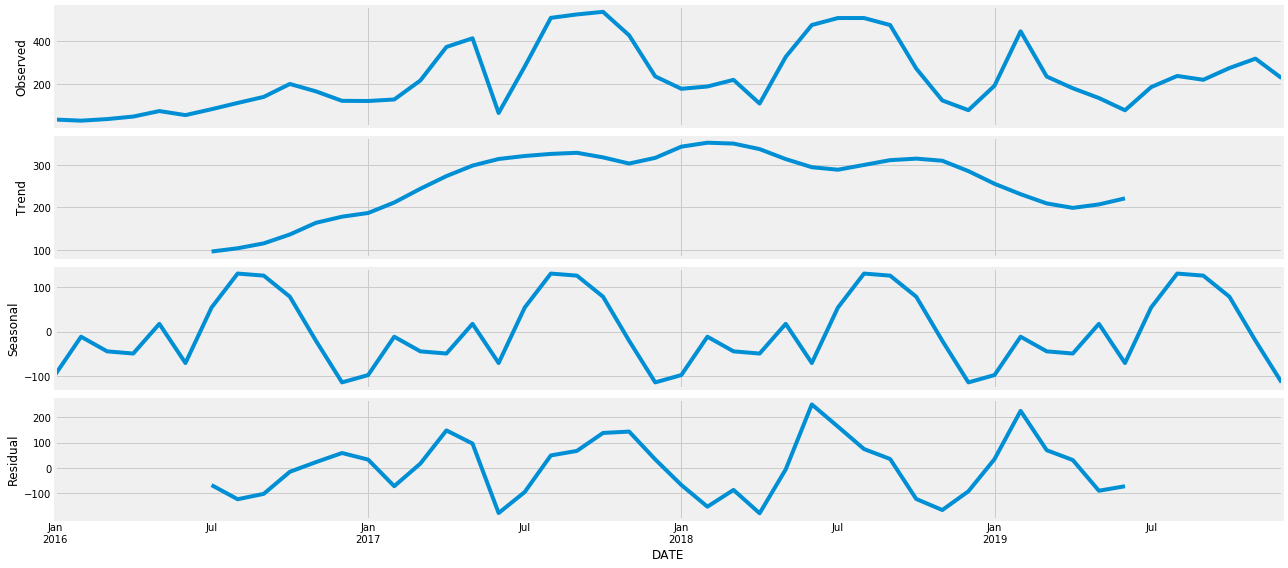

In [12]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_input, model='additive')
fig = decomposition.plot()
plt.show()

#### CHECK DATA TO TRAIN

In [13]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [14]:
df = pd.DataFrame(columns=['PARAMETER(Y0,Y1,Y2)','PARAM_SEASON(Y0,Y1,Y2,Y3,12)','AIC'])

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_input,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            df = df.append({'PARAMETER(Y0,Y1,Y2)': param,
                            'PARAM_SEASON(Y0,Y1,Y2,Y3,12)': param_seasonal,
                            'AIC': results.aic},
                            ignore_index=True)
            
        except:
            continue

/home/ds/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/ds/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/ds/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/ds/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/ds/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check 

#### FIND BEST PARAMETERS USING AIC (Akaike Information Critera)

In [15]:
print('Para saber mais sobre o AIC, acesse:\nhttps://coolstatsblog.com/2013/08/14/using-aic-to-test-arima-models-2/')

df.sort_values('AIC')

Para saber mais sobre o AIC, acesse:
https://coolstatsblog.com/2013/08/14/using-aic-to-test-arima-models-2/


,"PARAMETER(Y0,Y1,Y2)","PARAM_SEASON(Y0,Y1,Y2,Y3,12)",AIC
41,"(1, 1, 0)","(1, 1, 0, 12)",287.736733
47,"(1, 1, 1)","(1, 1, 0, 12)",289.240457
35,"(1, 0, 1)","(1, 1, 0, 12)",296.215745
29,"(1, 0, 0)","(1, 1, 0, 12)",296.681742
17,"(0, 1, 0)","(1, 1, 0, 12)",298.113470
23,"(0, 1, 1)","(1, 1, 0, 12)",299.175657
11,"(0, 0, 1)","(1, 1, 0, 12)",310.819854
5,"(0, 0, 0)","(1, 1, 0, 12)",322.474525
45,"(1, 1, 1)","(1, 0, 0, 12)",434.643375
39,"(1, 1, 0)","(1, 0, 0, 12)",434.877220


#### TEST POSSIBIITIES WITH LOWEST AIC COMBINATIONS

- (1, 0, 1)x(1, 1, 0, 12) - 290 - bom, modelo identificou que existe uma faixa dentro da qual tende a variar
- (1, 1, 0)x(1, 1, 0, 12) - 287 - ruim, não identifica que o preço varia entre uma faixa...
- (1, 1, 1)x(1, 1, 0, 12) - 289 - ruim, não identifica que o preço varia entre uma faixa...

In [16]:
mod = sm.tsa.statespace.SARIMAX(df_input,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 0, 12),
                                observed = True,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5706      0.292      1.951      0.051      -0.003       1.144
ma.L1          0.3780      0.305      1.240      0.215      -0.220       0.976
ar.S.L12      -0.6704      0.257     -2.605      0.009      -1.175      -0.166
sigma2      1.615e+04   6052.281      2.668      0.008    4287.283     2.8e+04


#### GET DIANOSTICS ABOUT RESULTS

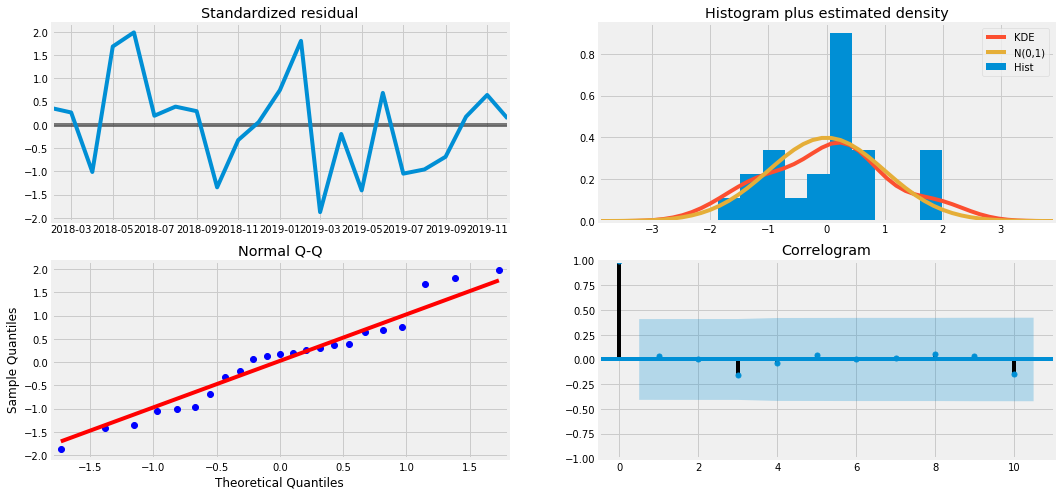

In [17]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

- Os resíduos estão na maioria concentrados próximo a 0, isto é bom por que mostra que o modelo possui uma tendencia de pouco residuo, o que ajuda na aplicação ARIMA
- Ainda assim, os resíduos variam muito, de 2 até -2
- Outro ponto que pode dificultar as projeções é o Correlograma que não apontou nenhuma correlação forte
- De toda forma, o método não será perfeito, uma vez que é simples. O ponto forte e que indica que pode ser interessante a análise é a sua tendência a apresentar uma distribuição normal para os resíduos.

O inicio da projeção sugere que o modelo esteja com "overfitting", mas a partir de Julho o modelo passa a ter um comportamento dentro do esperado


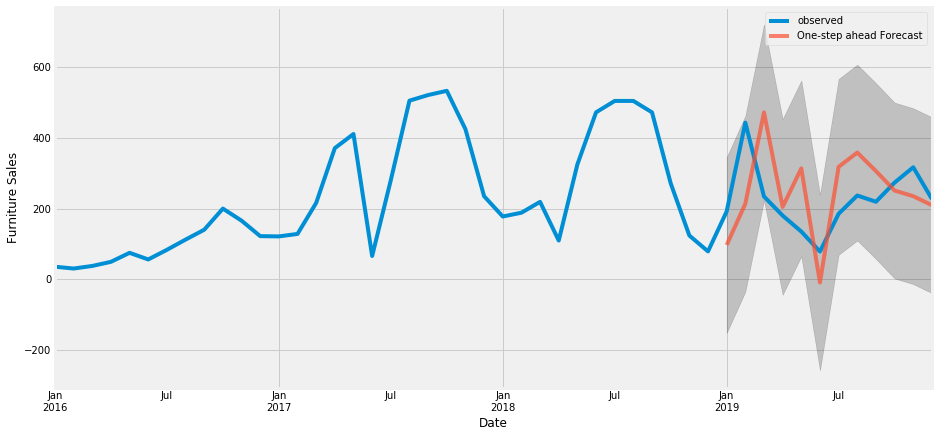

In [18]:
print('O inicio da projeção sugere que o modelo esteja com "overfitting", mas a partir de Julho o modelo passa a ter um comportamento dentro do esperado')

pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df_input['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Preço Médio PLD[R$]')
plt.legend()
plt.show()

#### GET ERROR ANALISYS

In [19]:
forecasted = pred.predicted_mean
truth = df_input['2019-01-01':]
mse = ((forecasted - truth) ** 2).mean()
print('O Erro Quadrático Médio da nossa projeção é {}'.format(round(mse, 2)))

print('Raiz do Erro Quadrático Médio da nossa projeção é {}'.format(round(np.sqrt(mse), 2)))

O Erro Quadrático Médio da nossa projeção é 17198.81
Raiz do Erro Quadrático Médio da nossa projeção é 131.14


- O Erro Quadrático Médio tende a mostra que para projeções maiores do que 1 ano o modelo tende a carregar um erro considerável
- Raiz do Erro Quadrático Médio mostra que na média ele deverá prever com um erro de R$ 131,14, o que pode ser considerado razoável, uma vez que os dados históricos variam entre 30 e 530. Um cuidado deverá ser com as projeções de valores negativos.


#### PLOT FORECAST

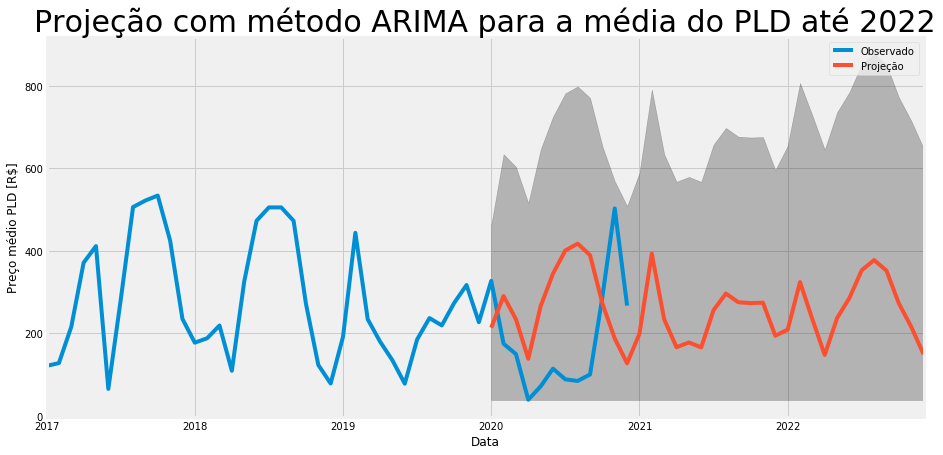

In [20]:
pred_uc = results.get_forecast(steps=36)
pred_ci = pred_uc.conf_int()
ax = df_input_orig['2017':].plot(label='Observado', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Projeção')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 1],
                39, color='k', alpha=.25)

ax.set_title('Projeção com método ARIMA para a média do PLD até 2022', fontsize = 30)
ax.set_xlabel('Data')
ax.set_ylabel('Preço médio PLD [R$]')
plt.legend()
plt.show()

- A projeção realizada apresenta um valor médio de expectativa razoável para compreender o como deve variar o preço do PLD no futuro, ainda que limitado a 3 anos
- Este insumo pode ser fundamental para compreender o melhor momento para contração, aproveitando assim janelas de contração de energia a um preço inferior

In [21]:
pred_ci.to_excel(os.getcwd().replace('notebooks','data/processed/') + 'PLD_MAXMIN_2021.xlsx')
pred_uc.predicted_mean.to_excel(os.getcwd().replace('notebooks','data/processed/') + 'PLD_2021.xlsx')

## CONSUMPTION

### DATA ETL

In [22]:
df_bills_uc1_ml = pd.read_excel(os.getcwd().replace('notebooks','data/interim/') + 'FATURAS - UFPR_etl3.xlsx')
df_bills_uc1_ml['DATE'] = pd.to_datetime(df_bills_uc1_ml['DATA'])
df_bills_uc1_ml = df_bills_uc1_ml.set_index('DATE')
df_bills_uc1_ml.head()

,Unnamed: 0,DATA,ANO,MÊS,DEMANDA_CONTRATADA_P,DEMANDA_CONTRATADA_FP,DEMANDA_REGISTRADA_P,DEMANDA_REGISTRADA_FP,CONSUMO_TOTAL
DATE,,,,,,,,,
2020-06-20,0,2020-06-20,2020,6,0,3330,1026.74,1178.19,626399
2020-05-20,1,2020-05-20,2020,5,0,3330,993.89,1113.05,611495
2020-04-20,2,2020-04-20,2020,4,0,3330,1349.17,2023.55,711086
2020-03-20,3,2020-03-20,2020,3,0,3330,2027.84,3239.39,931604
2020-02-20,4,2020-02-20,2020,2,0,3330,1852.30,2864.03,935313


### APPLYING ARIMA MODEL

#### CUT DATA

- É possível aplicar o modelo com as mesmas parametrizações também para a Energia Consumida na Ponta e para a Energia Consumida Fora Ponta
 - df_input_orig = df_bills_uc1_ml['ENERGIA_FPONTA']
 - df_input_orig = df_bills_uc1_ml['ENERGIA_PONTA']

In [23]:
df_input_orig = df_bills_uc1_ml['CONSUMO_TOTAL'].resample('MS').mean()
df_input = df_input_orig[:'2019']
df_input.tail()

DATE
2019-08-01     931604
2019-09-01    1076488
2019-10-01    1041209
2019-11-01    1110819
2019-12-01    1011029
Freq: MS, Name: CONSUMO_TOTAL, dtype: int64

#### DECOMPOSE DATA TO IDENTIFY SAZONALITY

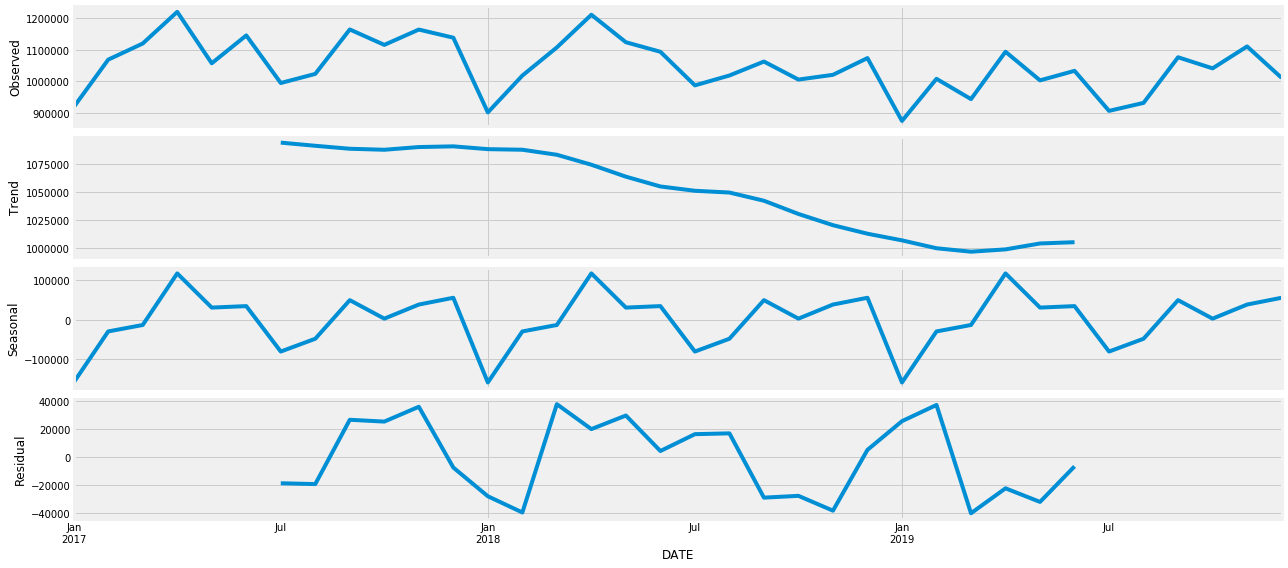

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_input, model='additive')
fig = decomposition.plot()
plt.show()

#### CHECK DATA TO TRAIN

In [25]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [26]:
df = pd.DataFrame(columns=['PARAMETER(Y0,Y1,Y2)','PARAM_SEASON(Y0,Y1,Y2,12)','AIC'])

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_input,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            df = df.append({'PARAMETER(Y0,Y1,Y2)': param,
                            'PARAM_SEASON(Y0,Y1,Y2,12)': param_seasonal,
                            'AIC': results.aic},
                            ignore_index=True)
            
        except:
            continue

#### FIND BEST PARAMETERS USING AIC (Akaike Information Critera)

In [27]:
print('Para saber mais sobre o AIC, acesse:\nhttps://coolstatsblog.com/2013/08/14/using-aic-to-test-arima-models-2/')

df.sort_values('AIC')

Para saber mais sobre o AIC, acesse:
https://coolstatsblog.com/2013/08/14/using-aic-to-test-arima-models-2/


,"PARAMETER(Y0,Y1,Y2)","PARAM_SEASON(Y0,Y1,Y2,12)",AIC
27,"(1, 1, 0)","(1, 1, 0, 12)",253.117652
31,"(1, 1, 1)","(1, 1, 0, 12)",255.308755
11,"(0, 1, 0)","(1, 1, 0, 12)",274.664503
19,"(1, 0, 0)","(1, 1, 0, 12)",276.950786
15,"(0, 1, 1)","(1, 1, 0, 12)",277.820508
23,"(1, 0, 1)","(1, 1, 0, 12)",279.283204
7,"(0, 0, 1)","(1, 1, 0, 12)",309.253497
3,"(0, 0, 0)","(1, 1, 0, 12)",310.098815
13,"(0, 1, 1)","(0, 1, 0, 12)",530.219347
29,"(1, 1, 1)","(0, 1, 0, 12)",532.214504


#### TEST POSSIBIITIES WITH LOWEST AIC COMBINATIONS

- (1, 1, 0)x(1, 1, 0, 12) - 253 - bom, modelo identificou que existe uma faixa dentro da qual tende a variar
- (1, 1, 1)x(1, 1, 0, 12) - 255 - bom também, mas passa uma impressão de overfitting
- (0, 1, 0)x(1, 1, 0, 12) - 274 - ruim, não identifica nada muito diferente da opção de menor AIC e utiliza uma componete a menos

In [28]:
mod = sm.tsa.statespace.SARIMAX(df_input,
                                order=(1,1,0),
                                seasonal_order=(1, 1, 0, 12),
                                observed = True,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2707      0.796     -0.340      0.734      -1.831       1.290
ar.S.L12      -0.9746      0.490     -1.988      0.047      -1.936      -0.014
sigma2      4.469e+09    1.6e-10    2.8e+19      0.000    4.47e+09    4.47e+09


#### GET DIANOSTICS ABOUT RESULTS

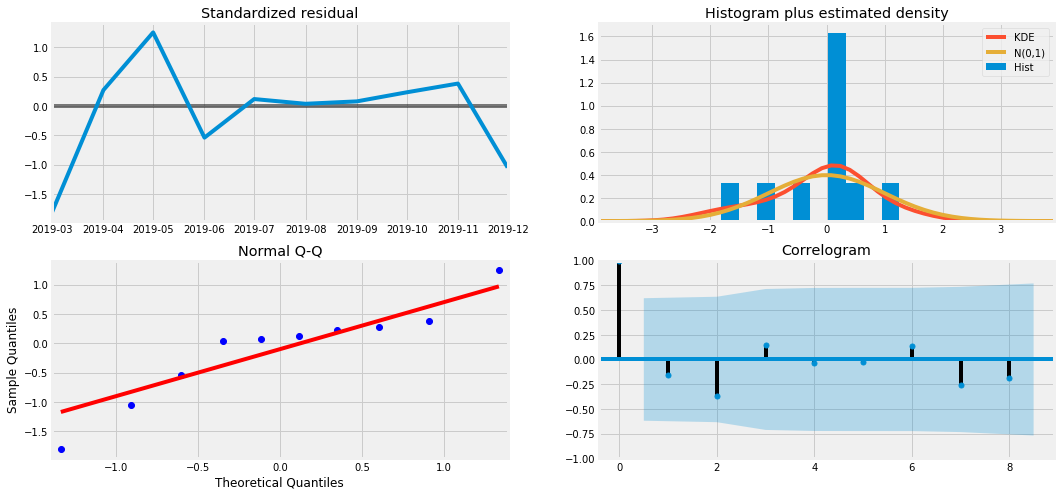

In [29]:
results.plot_diagnostics(figsize=(16, 8), lags=8)
plt.show()

- Os resíduos estão na maioria concentrados ao redor de 0, no entanto pouco ocorre em zero, tomar cuidado com overfitting, pois o modelo pode tentar acertar esse resíduo,
- Por outro lado, os resíduos variam muito, de 1 até -1, o que uma faixa relativamente pequena
- Outro ponto que pode dificultar as projeções é o Correlograma que não apontou nenhuma correlação forte
- De toda forma, o método não será perfeito, uma vez que é simples. O ponto forte e que indica que pode ser interessante a análise é a sua a sazonalidade identificada na decomposição do histórico.

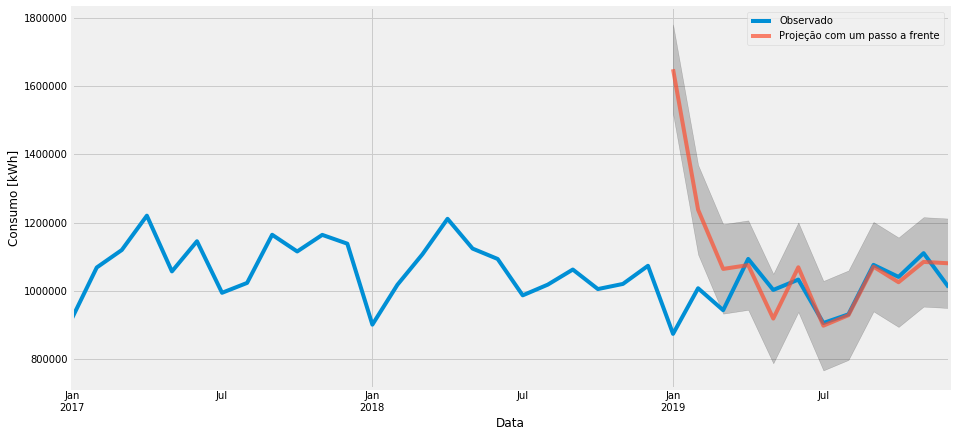

In [30]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df_input['2015':].plot(label='Observado')
pred.predicted_mean.plot(ax=ax, label='Projeção com um passo a frente', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Data')
ax.set_ylabel('Consumo [kWh]')
plt.legend()
plt.show()

- O final da projeção sugere que o modelo esteja com "overfitting", mas o ínicio sugere que a função deve não convergir

#### GET ERROR ANALISYS

In [31]:
forecasted = pred.predicted_mean
truth = df_input['2018-01-01':]
mse = ((forecasted - truth) ** 2).mean()
print('O Erro Quadrático Médio da nossa projeção é {}'.format(round(mse, 2)))

print('Raiz do Erro Quadrático Médio da nossa projeção é {}'.format(round(np.sqrt(mse), 2)))

O Erro Quadrático Médio da nossa projeção é 56947052331.79
Raiz do Erro Quadrático Médio da nossa projeção é 238635.82


- Raiz do Erro Quadrático Médio mostra que na média ele deverá prever com um erro de 238635,82 kWh, o que deve ser um valor elevado para o modelo
- Esse erro elevado pode estar associado a projeção para janeiro de 2019

#### PLOT FORECAST

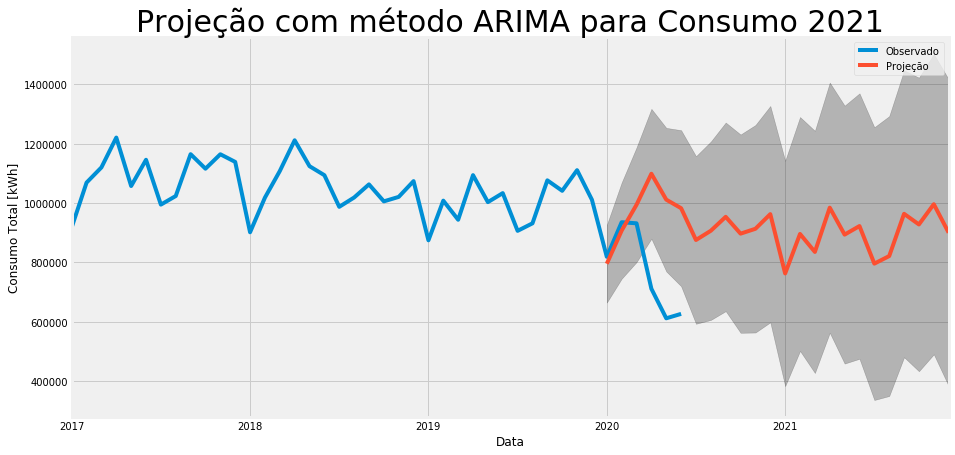

In [32]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = df_input_orig.plot(label='Observado', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Projeção')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
                #39, color='k', alpha=.25)
ax.set_title('Projeção com método ARIMA para Consumo 2021', fontsize = 30)
ax.set_xlabel('Data')
ax.set_ylabel('Consumo Total [kWh]')
plt.legend()
plt.show()

- Embora o modelo tenha apresentado um risco elevado de overfitting e convergência, a projeção indicada pode ser suficiente para aprensentar as expectativas de retorno em 2020 e até 2021 com base no consumo.

In [33]:
pred_ci.to_excel(os.getcwd().replace('notebooks','data/processed/') + 'CONSUMO_MAXMIN_2021.xlsx')
pred_uc.predicted_mean.to_excel(os.getcwd().replace('notebooks','data/processed/') + 'CONSUMO_2021.xlsx')

## DEMAND_FP

### DATA ETL

In [34]:
df_bills_uc1_ml = pd.read_excel(os.getcwd().replace('notebooks','data/interim/') + 'FATURAS - UFPR_etl3.xlsx')
df_bills_uc1_ml['DATE'] = pd.to_datetime(df_bills_uc1_ml['DATA'])
df_bills_uc1_ml = df_bills_uc1_ml.set_index('DATE')
df_bills_uc1_ml.head()

,Unnamed: 0,DATA,ANO,MÊS,DEMANDA_CONTRATADA_P,DEMANDA_CONTRATADA_FP,DEMANDA_REGISTRADA_P,DEMANDA_REGISTRADA_FP,CONSUMO_TOTAL
DATE,,,,,,,,,
2020-06-20,0,2020-06-20,2020,6,0,3330,1026.74,1178.19,626399
2020-05-20,1,2020-05-20,2020,5,0,3330,993.89,1113.05,611495
2020-04-20,2,2020-04-20,2020,4,0,3330,1349.17,2023.55,711086
2020-03-20,3,2020-03-20,2020,3,0,3330,2027.84,3239.39,931604
2020-02-20,4,2020-02-20,2020,2,0,3330,1852.30,2864.03,935313


### APPLYING ARIMA MODEL

#### CUT DATA

In [35]:
df_input_orig = df_bills_uc1_ml['DEMANDA_REGISTRADA_FP'].resample('MS').mean()
df_input = df_input_orig[:'2019']
df_input.tail()

DATE
2019-08-01    2927.15
2019-09-01    3280.85
2019-10-01    3519.14
2019-11-01    3582.62
2019-12-01    3279.23
Freq: MS, Name: DEMANDA_REGISTRADA_FP, dtype: float64

#### DECOMPOSE DATA TO IDENTIFY SAZONALITY

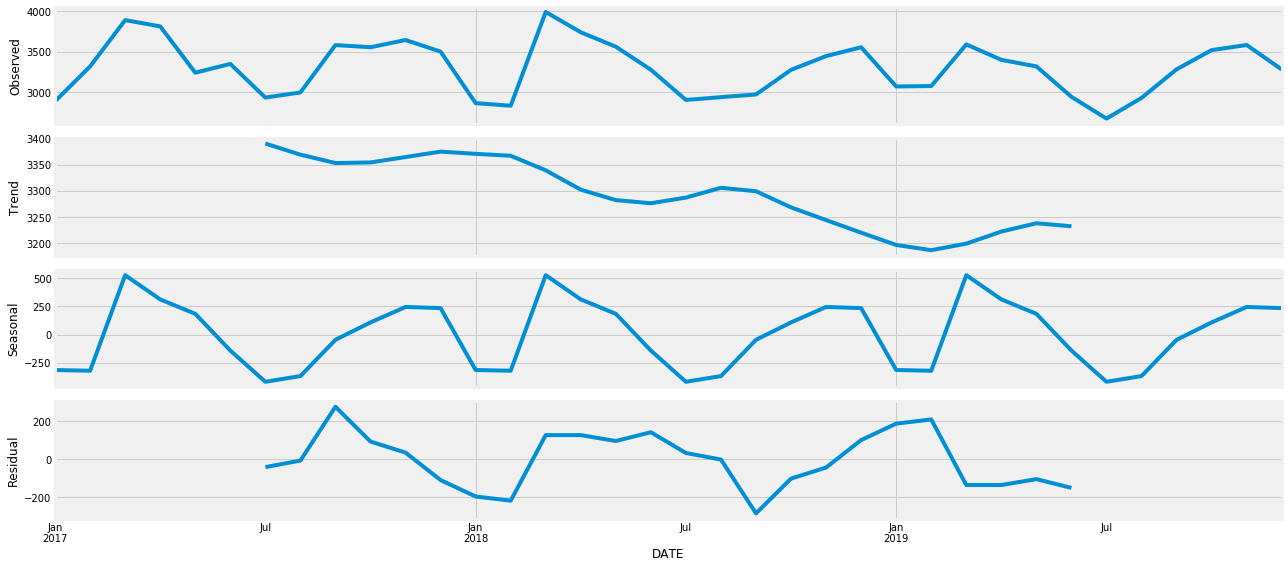

In [36]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_input, model='additive')
fig = decomposition.plot()
plt.show()

#### CHECK DATA TO TRAIN

In [37]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [38]:
df = pd.DataFrame(columns=['PARAMETER(Y0,Y1,Y2)','PARAM_SEASON(Y0,Y1,Y2,12)','AIC'])

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_input,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            df = df.append({'PARAMETER(Y0,Y1,Y2)': param,
                            'PARAM_SEASON(Y0,Y1,Y2,12)': param_seasonal,
                            'AIC': results.aic},
                            ignore_index=True)
            
        except:
            continue

#### FIND BEST PARAMETERS USING AIC (Akaike Information Critera)

In [39]:
print('Para saber mais sobre o AIC, acesse:\nhttps://coolstatsblog.com/2013/08/14/using-aic-to-test-arima-models-2/')
df.sort_values('AIC')

Para saber mais sobre o AIC, acesse:
https://coolstatsblog.com/2013/08/14/using-aic-to-test-arima-models-2/


,"PARAMETER(Y0,Y1,Y2)","PARAM_SEASON(Y0,Y1,Y2,12)",AIC
27,"(1, 1, 0)","(1, 1, 0, 12)",141.487872
31,"(1, 1, 1)","(1, 1, 0, 12)",142.107458
19,"(1, 0, 0)","(1, 1, 0, 12)",152.328134
11,"(0, 1, 0)","(1, 1, 0, 12)",152.912265
23,"(1, 0, 1)","(1, 1, 0, 12)",152.987103
15,"(0, 1, 1)","(1, 1, 0, 12)",154.747966
7,"(0, 0, 1)","(1, 1, 0, 12)",163.802736
3,"(0, 0, 0)","(1, 1, 0, 12)",167.519360
13,"(0, 1, 1)","(0, 1, 0, 12)",299.274422
29,"(1, 1, 1)","(0, 1, 0, 12)",300.928095


#### TEST POSSIBIITIES WITH LOWEST AIC COMBINATIONS

- (1, 1, 0)x(1, 1, 0, 12) - 141 - bom, modelo identificou que existe uma faixa dentro da qual tende a variar
- (1, 1, 1)x(1, 1, 0, 12) - 142 - bom também, mas passa uma impressão de overfitting
- (1, 0, 0)x(1, 1, 0, 12) - 152 - ruim, não identifica nada muito diferente da opção de menor AIC e utiliza uma componete a menos

In [40]:
mod = sm.tsa.statespace.SARIMAX(df_input,
                                order=(1,1,0),
                                seasonal_order=(1, 1, 0, 12),
                                observed = True,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0988      0.542     -0.182      0.855      -1.162       0.964
ar.S.L12      -0.5830      0.285     -2.044      0.041      -1.142      -0.024
sigma2      4.485e+04   3.08e+04      1.457      0.145   -1.55e+04    1.05e+05


#### GET DIANOSTICS ABOUT RESULTS

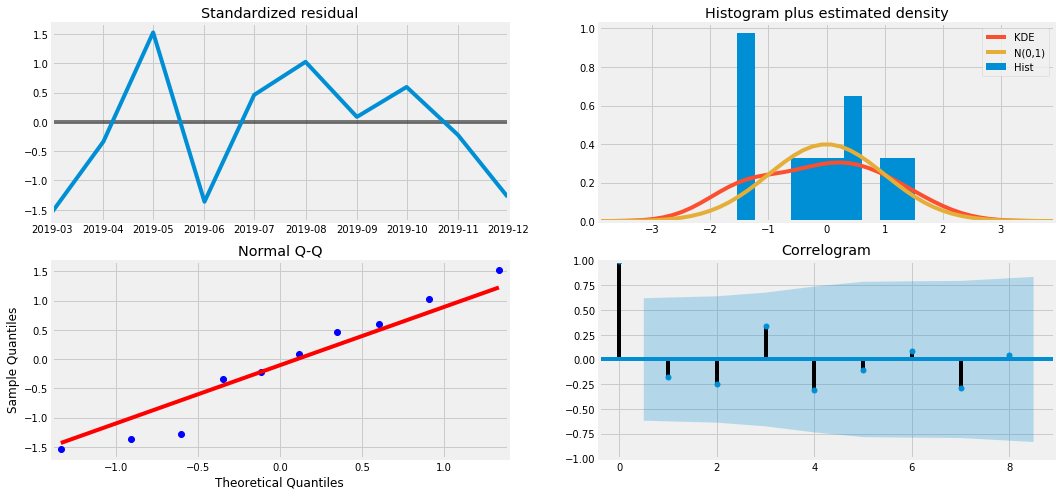

In [41]:
results.plot_diagnostics(figsize=(16, 8), lags=8)
plt.show()

- Os resíduos estão na maioria concentrados ao redor de 0, no entanto pouco ocorre em zero, tomar cuidado com overfitting, pois o modelo pode tentar acertar esse resíduo,
- Por outro lado, os resíduos variam muito, de 1.5 até -1.5, o que uma faixa relativamente pequena
- Outro ponto que pode dificultar as projeções é o Correlograma que não apontou nenhuma correlação forte
- De toda forma, o método não será perfeito, uma vez que é simples. O ponto forte e que indica que pode ser interessante a análise é a sua a sazonalidade identificada na decomposição do histórico.

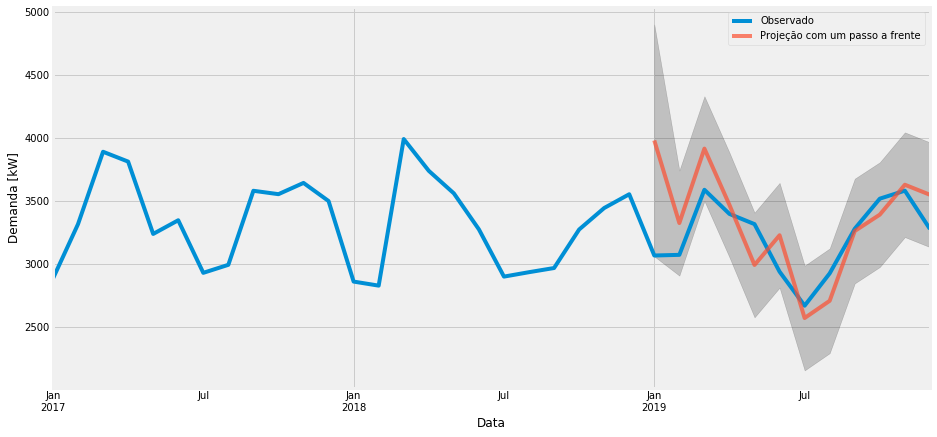

In [42]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df_input['2015':].plot(label='Observado')
pred.predicted_mean.plot(ax=ax, label='Projeção com um passo a frente', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Data')
ax.set_ylabel('Demanda [kW]')
plt.legend()
plt.show()

- O final da projeção sugere que o modelo esteja com "overfitting", mas o ínicio sugere que a função deve não convergir. Necessário testar.

#### GET ERROR ANALISYS

In [43]:
forecasted = pred.predicted_mean
truth = df_input['2018-01-01':]
mse = ((forecasted - truth) ** 2).mean()
print('O Erro Quadrático Médio da nossa projeção é {}'.format(round(mse, 2)))

print('Raiz do Erro Quadrático Médio da nossa projeção é {}'.format(round(np.sqrt(mse), 2)))

O Erro Quadrático Médio da nossa projeção é 111979.84
Raiz do Erro Quadrático Médio da nossa projeção é 334.63


- Raiz do Erro Quadrático Médio mostra que na média ele deverá prever com um erro de 334,63 kW, um valor razolável, visto a simplicidade do modelo e que o dado varia entre 2500 e 4000, um erro menor que 15% no pior caso
- Esse erro elevado pode estar associado a projeção para janeiro de 2019

#### PLOT FORECAST

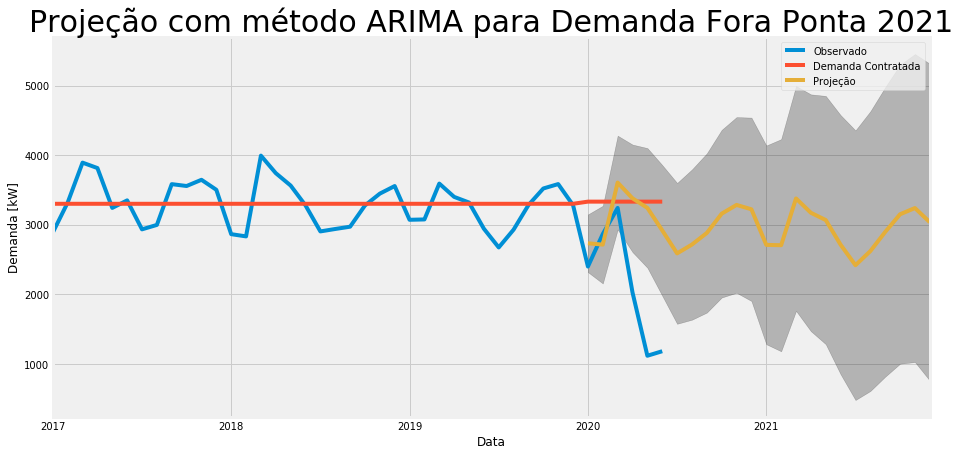

In [44]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = df_input_orig.plot(label='Observado', figsize=(14, 7))
df_bills_uc1_ml['DEMANDA_CONTRATADA_FP'].plot(ax=ax, label='Demanda Contratada')
pred_uc.predicted_mean.plot(ax=ax, label='Projeção')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
                #39, color='k', alpha=.25)
ax.set_title('Projeção com método ARIMA para Demanda Fora Ponta 2021', fontsize = 30)
ax.set_xlabel('Data')
ax.set_ylabel('Demanda [kW]')
plt.legend()
plt.show()

- Embora o modelo tenha apresentado um risco elevado de overfitting e convergência, a projeção indicada pode ser suficiente para aprensentar as expectativas de contratação em 2020 e até 2021 com base na demanda projetada.

In [45]:
pred_ci.to_excel(os.getcwd().replace('notebooks','data/processed/') + 'DEMANDA_FPONTA_MAXMIN_2021.xlsx')
pred_uc.predicted_mean.to_excel(os.getcwd().replace('notebooks','data/processed/') + 'DEMANDA_FPONTA_2021.xlsx')

## DEMAND_P

### DATA ETL

In [46]:
df_bills_uc1_ml = pd.read_excel(os.getcwd().replace('notebooks','data/interim/') + 'FATURAS - UFPR_etl3.xlsx')
df_bills_uc1_ml['DATE'] = pd.to_datetime(df_bills_uc1_ml['DATA'])
df_bills_uc1_ml = df_bills_uc1_ml.set_index('DATE')
df_bills_uc1_ml.head()

,Unnamed: 0,DATA,ANO,MÊS,DEMANDA_CONTRATADA_P,DEMANDA_CONTRATADA_FP,DEMANDA_REGISTRADA_P,DEMANDA_REGISTRADA_FP,CONSUMO_TOTAL
DATE,,,,,,,,,
2020-06-20,0,2020-06-20,2020,6,0,3330,1026.74,1178.19,626399
2020-05-20,1,2020-05-20,2020,5,0,3330,993.89,1113.05,611495
2020-04-20,2,2020-04-20,2020,4,0,3330,1349.17,2023.55,711086
2020-03-20,3,2020-03-20,2020,3,0,3330,2027.84,3239.39,931604
2020-02-20,4,2020-02-20,2020,2,0,3330,1852.30,2864.03,935313


### APPLYING ARIMA MODEL

#### CUT DATA

In [47]:
df_input_orig = df_bills_uc1_ml['DEMANDA_REGISTRADA_P'].resample('MS').mean()
df_input = df_input_orig[:'2019']
df_input.tail()

DATE
2019-08-01    1926.17
2019-09-01    2217.04
2019-10-01    2173.05
2019-11-01    2241.97
2019-12-01    2112.93
Freq: MS, Name: DEMANDA_REGISTRADA_P, dtype: float64

#### DECOMPOSE DATA TO IDENTIFY SAZONALITY

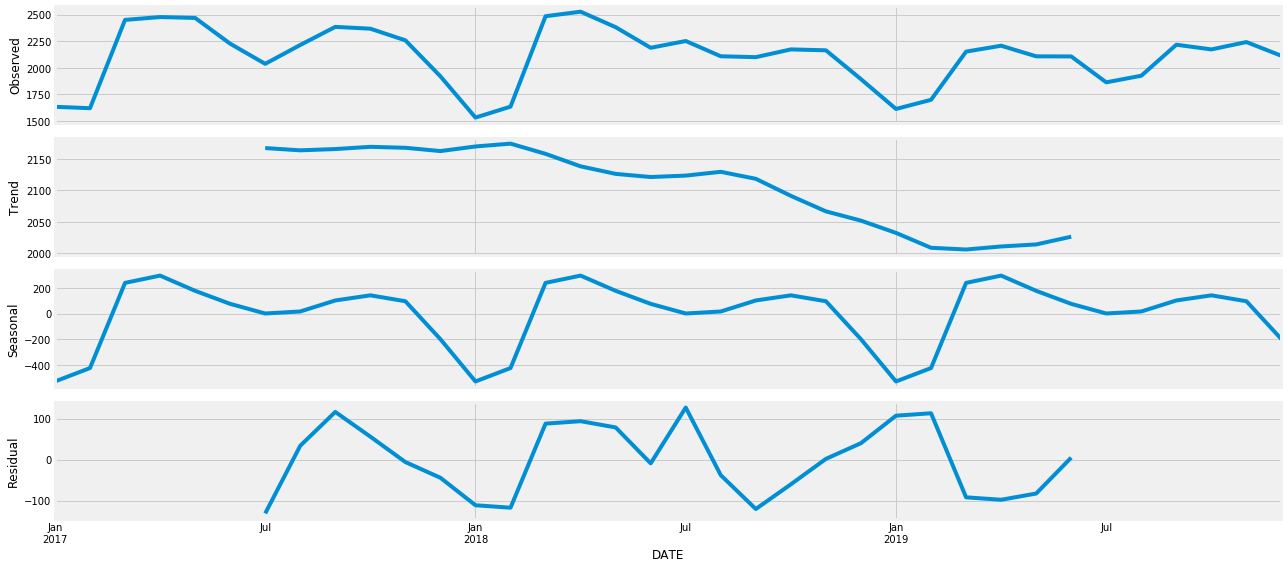

In [48]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_input, model='additive')
fig = decomposition.plot()
plt.show()

#### CHECK DATA TO TRAIN

In [49]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [50]:
df = pd.DataFrame(columns=['PARAMETER(Y0,Y1,Y2)','PARAM_SEASON(Y0,Y1,Y2,12)','AIC'])

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_input,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            df = df.append({'PARAMETER(Y0,Y1,Y2)': param,
                            'PARAM_SEASON(Y0,Y1,Y2,12)': param_seasonal,
                            'AIC': results.aic},
                            ignore_index=True)
            
        except:
            continue

#### FIND BEST PARAMETERS USING AIC (Akaike Information Critera)

In [51]:
print('Para saber mais sobre o AIC, acesse:\nhttps://coolstatsblog.com/2013/08/14/using-aic-to-test-arima-models-2/')

df.sort_values('AIC')

Para saber mais sobre o AIC, acesse:
https://coolstatsblog.com/2013/08/14/using-aic-to-test-arima-models-2/


,"PARAMETER(Y0,Y1,Y2)","PARAM_SEASON(Y0,Y1,Y2,12)",AIC
27,"(1, 1, 0)","(1, 1, 0, 12)",137.146570
31,"(1, 1, 1)","(1, 1, 0, 12)",138.960251
11,"(0, 1, 0)","(1, 1, 0, 12)",147.982383
19,"(1, 0, 0)","(1, 1, 0, 12)",148.452261
15,"(0, 1, 1)","(1, 1, 0, 12)",149.501464
23,"(1, 0, 1)","(1, 1, 0, 12)",150.341555
7,"(0, 0, 1)","(1, 1, 0, 12)",163.544724
3,"(0, 0, 0)","(1, 1, 0, 12)",165.435918
29,"(1, 1, 1)","(0, 1, 0, 12)",280.419958
13,"(0, 1, 1)","(0, 1, 0, 12)",281.179763


#### TEST POSSIBIITIES WITH LOWEST AIC COMBINATIONS

- (1, 1, 0)x(1, 1, 0, 12) - 137 - bom, modelo identificou que existe uma faixa dentro da qual tende a variar
- (1, 1, 1)x(1, 1, 0, 12) - 138 - bom também, mas passa uma impressão de overfitting
- (0, 1, 0)x(1, 1, 0, 12) - 147 - ruim, não identifica nada muito diferente da opção de menor AIC e utiliza uma componete a menos

In [52]:
mod = sm.tsa.statespace.SARIMAX(df_input,
                                order=(1,1,0),
                                seasonal_order=(1, 1, 0, 12),
                                observed = True,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2384      0.630     -0.378      0.705      -1.474       0.997
ar.S.L12      -0.7946      0.612     -1.299      0.194      -1.994       0.405
sigma2      2.905e+04   1.48e+04      1.966      0.049      86.233     5.8e+04


#### GET DIANOSTICS ABOUT RESULTS

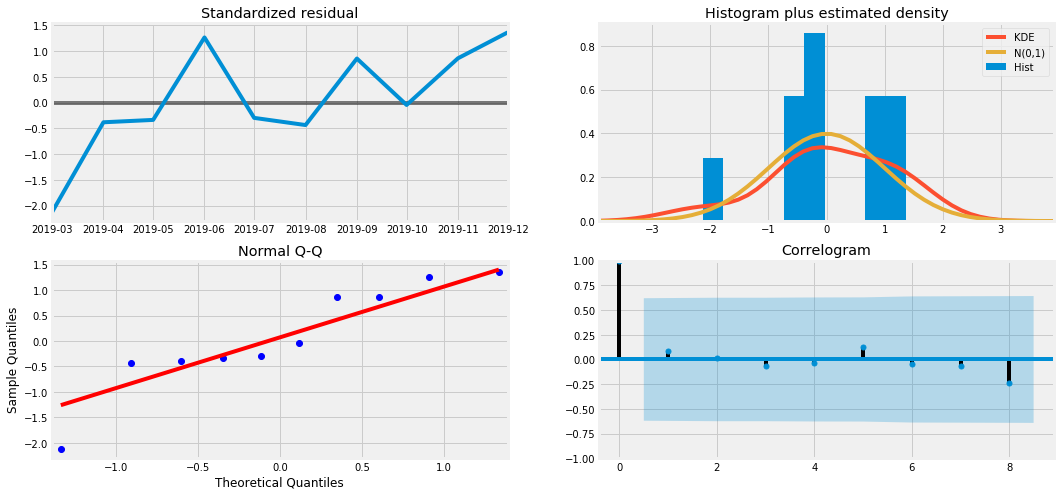

In [53]:
results.plot_diagnostics(figsize=(16, 8), lags=8)
plt.show()

- Os resíduos estão na maioria concentrados ao redor de 0, no entanto pouco ocorre em zero, tomar cuidado com overfitting, pois o modelo pode tentar acertar esse resíduo,
- Por outro lado, os resíduos variam muito, de -2 até 1.5, o que uma faixa moderada de resíduo
- Outro ponto que pode dificultar as projeções é o Correlograma que não apontou nenhuma correlação forte
- De toda forma, o método não será perfeito, uma vez que é simples. O ponto forte e que indica que pode ser interessante a análise é a sua a sazonalidade identificada na decomposição do histórico.

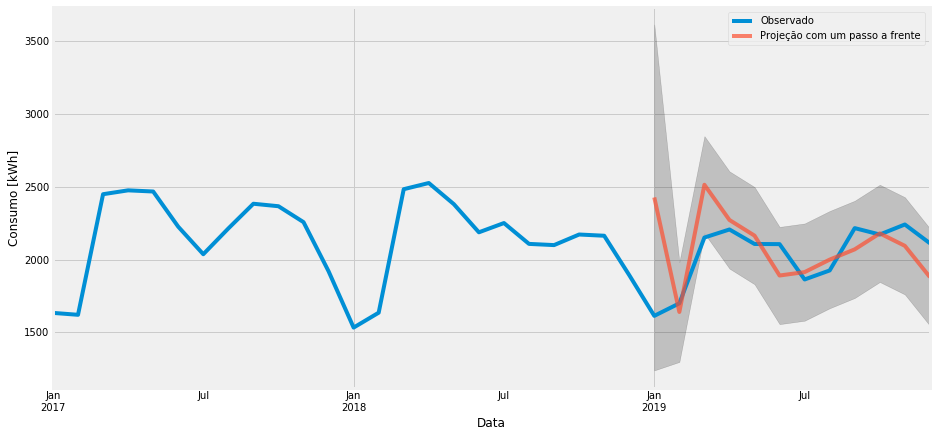

In [54]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df_input['2015':].plot(label='Observado')
pred.predicted_mean.plot(ax=ax, label='Projeção com um passo a frente', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Data')
ax.set_ylabel('Consumo [kWh]')
plt.legend()
plt.show()

- O final da projeção sugere que o modelo esteja com "overfitting", mas o ínicio sugere que a função deve não convergir

#### GET ERROR ANALISYS

In [55]:
forecasted = pred.predicted_mean
truth = df_input['2018-01-01':]
mse = ((forecasted - truth) ** 2).mean()
print('O Erro Quadrático Médio da nossa projeção é {}'.format(round(mse, 2)))

print('Raiz do Erro Quadrático Médio da nossa projeção é {}'.format(round(np.sqrt(mse), 2)))

O Erro Quadrático Médio da nossa projeção é 79670.38
Raiz do Erro Quadrático Médio da nossa projeção é 282.26


- Raiz do Erro Quadrático Médio mostra que na média ele deverá prever com um erro de 282,26 kW, o que é um valor razoável visto que os histórico de dados varia entre 1500 e 2500, isso significa que no pior caso, o modelo ainda possui menos de 20% de erro
- Esse erro elevado pode estar associado a projeção para janeiro de 2019

#### PLOT FORECAST

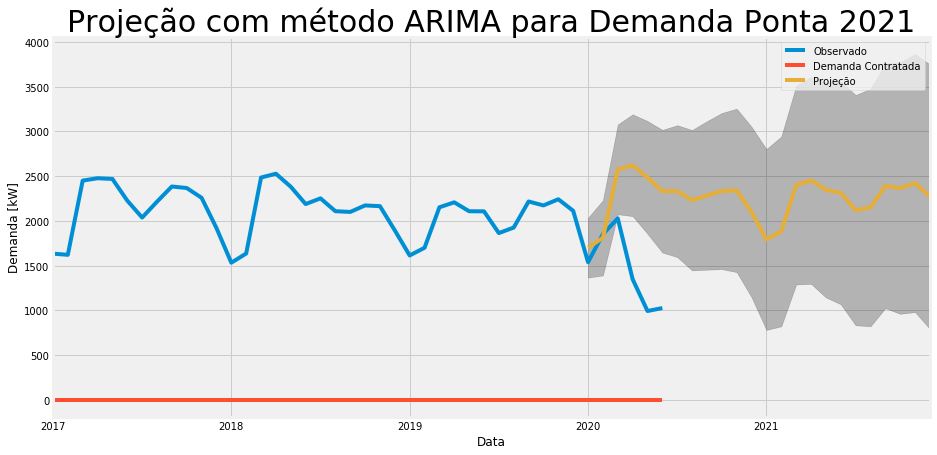

In [56]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = df_input_orig.plot(label='Observado', figsize=(14, 7))
df_bills_uc1_ml['DEMANDA_CONTRATADA_P'].plot(ax=ax, label='Demanda Contratada')
pred_uc.predicted_mean.plot(ax=ax, label='Projeção')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
                #39, color='k', alpha=.25)
ax.set_title('Projeção com método ARIMA para Demanda Ponta 2021', fontsize = 30)
ax.set_xlabel('Data')
ax.set_ylabel('Demanda [kW]')
plt.legend()
plt.show()

- Embora o modelo tenha apresentado um risco elevado de overfitting e convergência, a projeção indicada pode ser suficiente para aprensentar as expectativas de retorno em 2020 e até 2021 com base na demanda projetada.

In [57]:
pred_ci.to_excel(os.getcwd().replace('notebooks','data/processed/') + 'DEMANDA_PONTA_MAXMIN_2021.xlsx')
pred_uc.predicted_mean.to_excel(os.getcwd().replace('notebooks','data/processed/') + 'DEMANDA_PONTA_2021.xlsx')

# CONCLUSÕES E TRABALHOS FUTUROS

O modelo de AutoRegressive Integrated Moving Average (ARIMA) apresentou um comportamento adequado quando utilizado na projeção do PLD. Embora apresente valores mínimos inferiores 0 e que assim seriam inferiores ao piso do PLD para o período, o algoritmo foi capaz de compreender a existência de uma faixa onde a grandeza permanece variando. A capacidade de identificar esse comportamento é algo positivo e importante para previsão dos preços em um horizonte de curto a médio prazo.

Para as grandezas avaliadas Consumo Total, Demanda Ponta e Demanda Fora Ponta, o modelo ARIMA conseguiu apresentar uma previsão pelo menos razoável, podendo fornecer insumos para contratação de energia como janelas de sazonalidade de consumo elevado e consumo baixo, o mesmo se aplica para demanda.

Ainda assim, o modelo ARIMA nao conseguiu apresentar uma convergência para os valores máximos e mínimos das grandezas Consumo Total, Demanda Ponta e Demanda Fora Ponta. Este ponto pode ser melhorado utilizando outros métodos de projeção, um ínicio seria utilizando o modelo Prophet do Facebook, pois é um modelo capaz de capturar com facilidade sazonalidades. No entanto, sua aplicação neste caso precisa ser melhor avaliada, pois o Prophet é um modelo preparado para receber Big Data, algo que pode não compreender muito bem se tiver poucos dados.